### DATA PT12 - Proyecto final - Grupo 2
#### Control de calidad de los datos del archivo Google Maps metadata_sitios de los estados de New Jersey (NJ) y New York (NY)

In [1]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
carpeta = r"datos/googlemaps/metadata-sitios"

In [3]:
# # Obtener la lista de archivos JSON en carpeta
# archivos_json = glob.glob(os.path.join(carpeta, "*.json"))

# # Función para leer un JSON individualmente
# def leer_json(archivo):
#     return pd.read_json(archivo, lines=True)

# # Usar múltiples hilos para leer los archivos más rápido
# with ThreadPoolExecutor() as executor:
#     df_list = list(executor.map(leer_json, archivos_json))

# # Concatenar los DataFrames en uno solo
# metadata_sitios = pd.concat(df_list, ignore_index=True)

# metadata_sitios.head()

In [3]:
# Obtener la lista de archivos JSON en carpeta
archivos_json = glob.glob(os.path.join(carpeta, "*.json"))

In [4]:
# Se guardará archivos JSON en formato pickle (binario) el cual es más rápido para futuras consultas
for archivo in archivos_json:
    df = pd.read_json(archivo, lines=True)
    df.to_pickle(archivo.replace(".json", ".pkl"))  # Guardar como .pkl

In [5]:
# Carga los archivos Pickle generados y los combina en un solo DataFrame.
df_list = [pd.read_pickle(archivo.replace(".json", ".pkl")) for archivo in archivos_json] # convierte el nombre de cada archivo de .json a .pkl para cargarlo correctamente.
metadata_sitio = pd.concat(df_list, ignore_index=True)

metadata_sitio.head()

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,Porter Pharmacy,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",0x88f16e41928ff687:0x883dad4fd048e8f8,None,32.388300,-83.357100,[Pharmacy],4.9,16,None,"[[Friday, 8AM–6PM], [Saturday, 8AM–12PM], [Sun...","{'Service options': ['In-store shopping', 'Sam...",Open ⋅ Closes 6PM,"[0x88f16e41929435cf:0x5b2532a2885e9ef6, 0x88f1...",https://www.google.com/maps/place//data=!4m2!3...
1,City Textile,"City Textile, 3001 E Pico Blvd, Los Angeles, C...",0x80c2c98c0e3c16fd:0x29ec8a728764fdf9,None,34.018891,-118.215290,[Textile exporter],4.5,6,None,None,None,Open now,"[0x80c2c624136ea88b:0xb0315367ed448771, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
2,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",0x80c2c778e3b73d33:0xbdc58662a4a97d49,None,34.058092,-118.292130,[Korean restaurant],4.4,18,None,"[[Thursday, 6:30AM–6PM], [Friday, 6:30AM–6PM],...","{'Service options': ['Takeout', 'Dine-in', 'De...",Open ⋅ Closes 6PM,"[0x80c2c78249aba68f:0x35bf16ce61be751d, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
3,Nova Fabrics,"Nova Fabrics, 2200 E 11th St, Los Angeles, CA ...",0x80c2c89923b27a41:0x32041559418d447,None,34.023669,-118.232930,[Fabric store],3.3,6,None,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu...","{'Service options': ['In-store shopping'], 'Pa...",Open ⋅ Closes 5PM,"[0x80c2c8811477253f:0x23a8a492df1918f7, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
4,Nobel Textile Co,"Nobel Textile Co, 719 E 9th St, Los Angeles, C...",0x80c2c632f933b073:0xc31785961fe826a6,None,34.036694,-118.249421,[Fabric store],4.3,7,None,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu...",{'Service options': ['In-store pickup']},Open ⋅ Closes 5PM,"[0x80c2c62c496083d1:0xdefa11317fe870a1, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...


In [6]:
# Eliminamos columnas que no serán utilizadas

metadata_sitio = metadata_sitio.drop(columns=['price', 'hours', 'MISC', 'state', 'relative_results', 'url'])

In [7]:
metadata_sitio.columns

Index(['name', 'address', 'gmap_id', 'description', 'latitude', 'longitude',
       'category', 'avg_rating', 'num_of_reviews'],
      dtype='object')

In [8]:
metadata_sitio.head()

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews
0,Porter Pharmacy,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",0x88f16e41928ff687:0x883dad4fd048e8f8,None,32.388300,-83.357100,[Pharmacy],4.9,16
1,City Textile,"City Textile, 3001 E Pico Blvd, Los Angeles, C...",0x80c2c98c0e3c16fd:0x29ec8a728764fdf9,None,34.018891,-118.215290,[Textile exporter],4.5,6
2,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",0x80c2c778e3b73d33:0xbdc58662a4a97d49,None,34.058092,-118.292130,[Korean restaurant],4.4,18
3,Nova Fabrics,"Nova Fabrics, 2200 E 11th St, Los Angeles, CA ...",0x80c2c89923b27a41:0x32041559418d447,None,34.023669,-118.232930,[Fabric store],3.3,6
4,Nobel Textile Co,"Nobel Textile Co, 719 E 9th St, Los Angeles, C...",0x80c2c632f933b073:0xc31785961fe826a6,None,34.036694,-118.249421,[Fabric store],4.3,7


In [126]:
metadata_sitio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3025011 entries, 0 to 3025010
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   name            object 
 1   address         object 
 2   gmap_id         object 
 3   description     object 
 4   latitude        float64
 5   longitude       float64
 6   category        object 
 7   avg_rating      float64
 8   num_of_reviews  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 207.7+ MB


In [9]:
# reviso que categorias hay. Busco los restaurantes de pizza
# df_mt_sitios['category'].unique()
unique_categories = pd.DataFrame(metadata_sitio["category"].explode().unique() )

In [10]:
unique_categories.head()

,0
0,Pharmacy
1,Textile exporter
2,Korean restaurant
3,Fabric store
4,Restaurant


In [11]:
unique_resto = unique_categories[unique_categories[0].str.lower().str.contains("restaurant", na=False)]
unique_resto

,0
2,Korean restaurant
4,Restaurant
8,Health food restaurant
184,Buffet restaurant
238,Fast food restaurant
...,...
4416,Chettinad restaurant
4418,Sfiha restaurant
4433,Mutton barbecue restaurant
4452,Steamboat restaurant


In [15]:
print(unique_resto.to_string())

                                         0
2                        Korean restaurant
4                               Restaurant
8                   Health food restaurant
184                      Buffet restaurant
238                   Fast food restaurant
310                      Family restaurant
311                     Seafood restaurant
338                   Dominican restaurant
356                        Taco restaurant
412                     Mexican restaurant
448                     Restaurant or cafe
491                   Breakfast restaurant
492                       Lunch restaurant
603                       Asian restaurant
604                     Hot pot restaurant
605                     Chinese restaurant
640               Mediterranean restaurant
670                     Takeout Restaurant
730                     Italian restaurant
734                       Ramen restaurant
743                    American restaurant
745               Modern French restaurant
811        

In [14]:
metadata_sitio.head()

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews
0,Porter Pharmacy,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",0x88f16e41928ff687:0x883dad4fd048e8f8,None,32.388300,-83.357100,[Pharmacy],4.9,16
1,City Textile,"City Textile, 3001 E Pico Blvd, Los Angeles, C...",0x80c2c98c0e3c16fd:0x29ec8a728764fdf9,None,34.018891,-118.215290,[Textile exporter],4.5,6
2,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",0x80c2c778e3b73d33:0xbdc58662a4a97d49,None,34.058092,-118.292130,[Korean restaurant],4.4,18
3,Nova Fabrics,"Nova Fabrics, 2200 E 11th St, Los Angeles, CA ...",0x80c2c89923b27a41:0x32041559418d447,None,34.023669,-118.232930,[Fabric store],3.3,6
4,Nobel Textile Co,"Nobel Textile Co, 719 E 9th St, Los Angeles, C...",0x80c2c632f933b073:0xc31785961fe826a6,None,34.036694,-118.249421,[Fabric store],4.3,7


In [16]:
# selecciono las filas que tienen pizza restaurant
# df_mt_sitios_pizza = df_mt_sitios[df_mt_sitios['category'].apply(lambda x: 'Pizza restaurant' in x)]
# TypeError: argument of type 'NoneType' is not iterable

df_mt_sitios_pizza = metadata_sitio[metadata_sitio['category'].apply(lambda x: isinstance(x, list) and 'Pizza restaurant' in x)]

In [17]:
df_mt_sitios_pizza.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23814 entries, 1045 to 3025005
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            23814 non-null  object 
 1   address         23787 non-null  object 
 2   gmap_id         23814 non-null  object 
 3   description     12236 non-null  object 
 4   latitude        23814 non-null  float64
 5   longitude       23814 non-null  float64
 6   category        23814 non-null  object 
 7   avg_rating      23814 non-null  float64
 8   num_of_reviews  23814 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 1.8+ MB


Hay 23814 pizza restaurants. Solo 23787 tienen direccion.

In [18]:
# la columna address tiene datos de nombre, direccion, localidad, codigo postal y estado
# pongo cada datos en una columna distinta porque puedo necesitarlos mas adelante
print(df_mt_sitios_pizza['address'].iloc[0])
print(df_mt_sitios_pizza['address'].iloc[5])
print(df_mt_sitios_pizza['address'].iloc[10])
print(df_mt_sitios_pizza['address'].iloc[15])

Sir Pizza Xpress, 201 E Broad St, Smithville, TN 37166
Sgambati's New York Pizza, 2725 Manitowoc Rd, Green Bay, WI 54311
Higgy's Pizza, 4104 KY-3630, Annville, KY 40402
Alpine Pizza, 1104 U.S. 9, Schroon Lake, NY 12870


In [19]:
# Extract state (two uppercase letters) using regex
df_mt_sitios_pizza['state'] = df_mt_sitios_pizza['address'].str.extract(r',\s*([A-Z]{2})\s*\d{5}') 

In [20]:
df_mt_sitios_pizza['state'].unique()

array(['TN', 'CO', 'MI', 'MA', 'MN', 'WI', 'AZ', 'NY', 'GA', 'KY', 'MD',
       'AL', 'FL', 'CA', 'OR', 'PA', 'ID', 'TX', 'NJ', 'NC', 'ME', 'MO',
       'WA', 'OH', 'NV', 'CT', 'AR', 'IN', 'DE', 'IL', 'NE', 'DC', 'UT',
       'WY', 'OK', 'MT', 'VA', 'SC', 'IA', 'WV', 'LA', 'ND', 'MS', 'VT',
       'KS', 'SD', 'RI', 'NH', 'HI', 'NM', nan, 'AK'], dtype=object)

In [21]:
# veo cuantas pizzerias hay por estado. seleccionaremos las de NY y NJ. Por la cercania con el Met Stadium
df_mt_sitios_pizza.groupby('state').count()

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews
state,,,,,,,,,
AK,63,63,63,31,63,63,63,63,63
AL,239,239,239,165,239,239,239,239,239
AR,177,177,177,116,177,177,177,177,177
AZ,325,325,325,204,325,325,325,325,325
CA,2192,2192,2192,1357,2192,2192,2192,2192,2192
CO,369,369,369,231,369,369,369,369,369
CT,517,517,517,153,517,517,517,517,517
DC,69,69,69,49,69,69,69,69,69
DE,85,85,85,38,85,85,85,85,85


Hay datos de 1137 pizzerias en NJ y 2132 en NY

In [29]:
# selecciono las pizzerias de NJ y NY
df_mt_pizza_NJNY = df_mt_sitios_pizza[df_mt_sitios_pizza['state'].isin(['NJ', 'NY'])]

In [30]:
# Split address into components
df_mt_pizza_NJNY[['street_address', 'city', 'state_zip']] = df_mt_pizza_NJNY['address'].str.rsplit(", ", n=2, expand=True)

In [31]:
# Split state and zip code
df_mt_pizza_NJNY[['state', 'zip_code']] = df_mt_pizza_NJNY['state_zip'].str.split(" ", n=1, expand=True)

In [32]:
# Drop the intermediate column
df_mt_pizza_NJNY.drop(columns=['state_zip'], inplace=True)

In [33]:
df_mt_pizza_NJNY.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3269 entries, 2941 to 3024776
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            3269 non-null   object 
 1   address         3269 non-null   object 
 2   gmap_id         3269 non-null   object 
 3   description     998 non-null    object 
 4   latitude        3269 non-null   float64
 5   longitude       3269 non-null   float64
 6   category        3269 non-null   object 
 7   avg_rating      3269 non-null   float64
 8   num_of_reviews  3269 non-null   int64  
 9   state           3269 non-null   object 
 10  street_address  3269 non-null   object 
 11  city            3269 non-null   object 
 12  zip_code        3269 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 357.5+ KB


In [34]:
# renombro y reordeno las columnas
df_mt_pizza_NJNY.head()

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,state,street_address,city,zip_code
2941,Gino's Pizzeria,"Gino's Pizzeria, 790 Washington Ave, Brooklyn,...",0x89c25ba092402bc7:0xdfb44c575cf0a112,None,40.674273,-73.963328,"[Pizza restaurant, Italian restaurant]",3.3,3,NY,"Gino's Pizzeria, 790 Washington Ave",Brooklyn,11238
3066,Destino's Pizzeria,"Destino's Pizzeria, 3909 Creek Rd, Youngstown,...",0x89d360807867436d:0x91c44852e0384b78,None,43.223601,-79.017302,"[Pizza restaurant, Italian restaurant]",2.5,4,NY,"Destino's Pizzeria, 3909 Creek Rd",Youngstown,14174
4699,Alpine Pizza,"Alpine Pizza, 1104 U.S. 9, Schroon Lake, NY 12870",0x4ccab4b3af9c7c85:0x9defa19fe4e295c,None,43.837433,-73.761254,[Pizza restaurant],4.3,45,NY,"Alpine Pizza, 1104 U.S. 9",Schroon Lake,12870
4947,Stewart's Shops,"Stewart's Shops, 4192 NY-30, Amsterdam, NY 12010",0x89de5f9627d4e973:0x5b0cbc68d57ffefb,Convenience chain serving its own ice cream & ...,43.017033,-74.194120,"[Convenience store, Alternative fuel station, ...",2.2,15,NY,"Stewart's Shops, 4192 NY-30",Amsterdam,12010
8382,Al's Pizzeria,"Al's Pizzeria, 201 N Main St, Gloversville, NY...",0x89def3a6bb7c4091:0xde094955651ec4bf,None,43.056137,-74.342115,"[Pizza restaurant, Italian restaurant]",4.2,28,NY,"Al's Pizzeria, 201 N Main St",Gloversville,12078


In [35]:
# Extract everything after the first comma and strip any extra spaces
df_mt_pizza_NJNY['cleaned_address'] = df_mt_pizza_NJNY['street_address'].str.split(", ", n=1).str[1]

# Drop the original column if necessary
df_mt_pizza_NJNY.drop(columns=['address', 'street_address', 'description', 'category'], inplace=True)


In [36]:
df_mt_pizza_NJNY.head()

,name,gmap_id,latitude,longitude,avg_rating,num_of_reviews,state,city,zip_code,cleaned_address
2941,Gino's Pizzeria,0x89c25ba092402bc7:0xdfb44c575cf0a112,40.674273,-73.963328,3.3,3,NY,Brooklyn,11238,790 Washington Ave
3066,Destino's Pizzeria,0x89d360807867436d:0x91c44852e0384b78,43.223601,-79.017302,2.5,4,NY,Youngstown,14174,3909 Creek Rd
4699,Alpine Pizza,0x4ccab4b3af9c7c85:0x9defa19fe4e295c,43.837433,-73.761254,4.3,45,NY,Schroon Lake,12870,1104 U.S. 9
4947,Stewart's Shops,0x89de5f9627d4e973:0x5b0cbc68d57ffefb,43.017033,-74.194120,2.2,15,NY,Amsterdam,12010,4192 NY-30
8382,Al's Pizzeria,0x89def3a6bb7c4091:0xde094955651ec4bf,43.056137,-74.342115,4.2,28,NY,Gloversville,12078,201 N Main St


In [37]:
# renombro y reordeno las columnas
df_mt_pizza_NJNY.rename(columns={'name': 'business_name', 'cleaned_address': 'address'}, inplace=True)

In [38]:
cols = df_mt_pizza_NJNY.columns.tolist()
cols

['business_name',
 'gmap_id',
 'latitude',
 'longitude',
 'avg_rating',
 'num_of_reviews',
 'state',
 'city',
 'zip_code',
 'address']

In [39]:
cols = ['gmap_id', 'business_name', 'address' , 'city', 'state', 'zip_code',  'latitude', 'longitude', 'avg_rating', 'num_of_reviews']
df_mt_pizza_NJNY = df_mt_pizza_NJNY[cols] 
df_mt_pizza_NJNY.head()

,gmap_id,business_name,address,city,state,zip_code,latitude,longitude,avg_rating,num_of_reviews
2941,0x89c25ba092402bc7:0xdfb44c575cf0a112,Gino's Pizzeria,790 Washington Ave,Brooklyn,NY,11238,40.674273,-73.963328,3.3,3
3066,0x89d360807867436d:0x91c44852e0384b78,Destino's Pizzeria,3909 Creek Rd,Youngstown,NY,14174,43.223601,-79.017302,2.5,4
4699,0x4ccab4b3af9c7c85:0x9defa19fe4e295c,Alpine Pizza,1104 U.S. 9,Schroon Lake,NY,12870,43.837433,-73.761254,4.3,45
4947,0x89de5f9627d4e973:0x5b0cbc68d57ffefb,Stewart's Shops,4192 NY-30,Amsterdam,NY,12010,43.017033,-74.194120,2.2,15
8382,0x89def3a6bb7c4091:0xde094955651ec4bf,Al's Pizzeria,201 N Main St,Gloversville,NY,12078,43.056137,-74.342115,4.2,28


Reviso duplicados, nulos. Outliers en las columnas latitude, longitude,	avg_rating,	num_of_reviews
Vi que en algunas columnas la latitud y la longitud no estaban bien

In [46]:
# reviso duplicados
df_dup = df_mt_pizza_NJNY[df_mt_pizza_NJNY.duplicated(subset=['gmap_id'], keep=False)]
df_dup = df_dup.sort_values(['gmap_id'])

print(df_dup)


                                     gmap_id            business_name  \
4699    0x4ccab4b3af9c7c85:0x9defa19fe4e295c             Alpine Pizza   
31272   0x4ccab4b3af9c7c85:0x9defa19fe4e295c             Alpine Pizza   
41639  0x89c2591d61cb7f73:0xccc1cb04aeccdd84  Nino's Bellissima Pizza   
15066  0x89c2591d61cb7f73:0xccc1cb04aeccdd84  Nino's Bellissima Pizza   
36481  0x89c25943dffb2b23:0x558b3699bfd0dcb4                    Dough   
9908   0x89c25943dffb2b23:0x558b3699bfd0dcb4                    Dough   
38837  0x89c259f744b20deb:0xb536eb5ee402f92f     FREEHOLD In The Park   
12264  0x89c259f744b20deb:0xb536eb5ee402f92f     FREEHOLD In The Park   
40006  0x89c25ab649a37525:0x91f6c1bcc70b6a91              Rax's Pizza   
13433  0x89c25ab649a37525:0x91f6c1bcc70b6a91              Rax's Pizza   
2941   0x89c25ba092402bc7:0xdfb44c575cf0a112          Gino's Pizzeria   
29514  0x89c25ba092402bc7:0xdfb44c575cf0a112          Gino's Pizzeria   
25292  0x89c25ffabe6cc3db:0xaa42b7e0387f7896   Bell

In [47]:
df_dup.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, 4699 to 8382
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gmap_id         34 non-null     object 
 1   business_name   34 non-null     object 
 2   address         34 non-null     object 
 3   city            34 non-null     object 
 4   state           34 non-null     object 
 5   zip_code        34 non-null     object 
 6   latitude        34 non-null     float64
 7   longitude       34 non-null     float64
 8   avg_rating      34 non-null     float64
 9   num_of_reviews  34 non-null     int64  
dtypes: float64(3), int64(1), object(6)
memory usage: 2.9+ KB


In [ ]:
# elimino los duplicados manteniendo la primera instancia
df_mt_pizza_NJNY_sindup = df_mt_pizza_NJNY.drop_duplicates(subset=['gmap_id'], keep='first')

Hay datos de 17 pizzerias duplicados. Los elimino

In [50]:
df_mt_pizza_NJNY_sindup.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3252 entries, 2941 to 3024776
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gmap_id         3252 non-null   object 
 1   business_name   3252 non-null   object 
 2   address         3239 non-null   object 
 3   city            3252 non-null   object 
 4   state           3252 non-null   object 
 5   zip_code        3252 non-null   object 
 6   latitude        3252 non-null   float64
 7   longitude       3252 non-null   float64
 8   avg_rating      3252 non-null   float64
 9   num_of_reviews  3252 non-null   int64  
dtypes: float64(3), int64(1), object(6)
memory usage: 279.5+ KB


Hay 13 locales sin direccion pero tienen ciudad, estado, latitud y longitud. No los elimino </br>
Reviso si hay Outliers en las columnas latitude, longitude,	avg_rating,	num_of_reviews

min,  1.0
max,  5.0
mean,  4.110086100861008


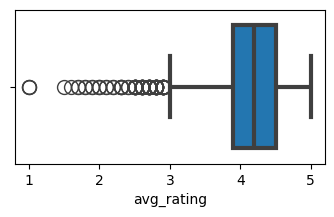

In [ ]:
plt.figure(figsize=(4, 2))
sns.boxplot(x = 'avg_rating', data = df_mt_pizza_NJNY_sindup,
            fliersize = 10, # Outlier size
            linewidth = 3,  # Lines width
            saturation = 0.95) # Fill color saturation

# reviso valor maximo y minimo. Creo que estan en el rango correcto
print('min, ', df_mt_pizza_NJNY_sindup['avg_rating'].min())
print('max, ', df_mt_pizza_NJNY_sindup['avg_rating'].max())
print('mean, ', df_mt_pizza_NJNY_sindup['avg_rating'].mean())

avg_rating. Rango 1.0 a 5.0 Media de 4.1

<Axes: xlabel='num_of_reviews'>

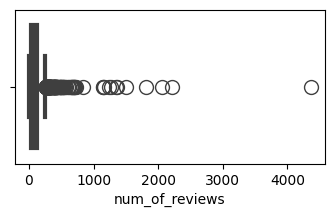

In [58]:
# reviso outliers en num_of_reviews
plt.figure(figsize=(4, 2))
sns.boxplot(x = 'num_of_reviews', data = df_mt_pizza_NJNY_sindup,
            fliersize = 10, # Outlier size
            linewidth = 3,  # Lines width
            saturation = 0.95) # Fill color saturation

In [60]:
# algunos tienen mas de 1900 reviews
df_mt_pizza_NJNY_sindup[df_mt_pizza_NJNY_sindup['num_of_reviews'] > 1500]

,gmap_id,business_name,address,city,state,zip_code,latitude,longitude,avg_rating,num_of_reviews
2535726,0x89c1869d2cf9ef11:0x64f5fd08d04f5288,River Rock Restaurant & Marina Bar,1600 NJ-70,Brick Township,NJ,08724,40.097238,-74.087589,4.2,1808
2586355,0x89c301a10bcb8c95:0x3f650fe7631ad509,Blaze Pizza,"1400 Willowbrook Mall, Wayne",NJ 07470,United,States,40.888317,-74.260410,4.8,2208
2627996,0x89c25985f7ec1beb:0x3c39f655da433d9d,Prince St. Pizza,"27 Prince St A, New York",NY 10012,United,States,40.723084,-73.994528,4.6,4362
2640098,0x89c19a2bc29e9fd5:0xfaaa7ec7e19ffc6f,The Sawmill,"1807 Boardwalk, Seaside Park",NJ 08752,United,States,39.935696,-74.072155,4.3,2057


Tiene casi el doble reviews que el segundo pero podría ser un valor válido. </br>
Reviso si la latitud y longitud son correctas

In [61]:
# pip install geopy
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

In [64]:
# Initialize geocoder
geolocator = Nominatim(user_agent="geo_checker")

# Function to get latitude & longitude from full address
def get_lat_long(address, city, state, zip_code):
    full_address = f"{address}, {city}, {state} {zip_code}"
    try:
        location = geolocator.geocode(full_address, timeout=10)
        if location:
            return location.latitude, location.longitude
        else:
            return None, None
    except GeocoderTimedOut:
        return None, None

In [65]:
# Apply the function to fetch verified coordinates
df_mt_pizza_NJNY_sindup[['verified_latitude', 'verified_longitude']] = df_mt_pizza_NJNY_sindup.apply(
    lambda row: pd.Series(get_lat_long(row['address'], row['city'], row['state'], row['zip_code'])), axis=1
)


In [66]:
# Compare the existing vs verified coordinates
df_mt_pizza_NJNY_sindup['lat_diff'] = abs(df_mt_pizza_NJNY_sindup['latitude'] - df_mt_pizza_NJNY_sindup['verified_latitude'])
df_mt_pizza_NJNY_sindup['long_diff'] = abs(df_mt_pizza_NJNY_sindup['longitude'] - df_mt_pizza_NJNY_sindup['verified_longitude'])

In [67]:
# Check rows where the difference is significant (e.g., > 0.01 degrees)
incorrect_coords = df_mt_pizza_NJNY_sindup[(df_mt_pizza_NJNY_sindup['lat_diff'] > 0.01) | (df_mt_pizza_NJNY_sindup['long_diff'] > 0.01)]

# Display incorrect rows
print(incorrect_coords[['address', 'city', 'state', 'zip_code', 
                        'latitude', 'longitude', 'verified_latitude', 'verified_longitude', 
                        'lat_diff', 'long_diff']])

                    address          city state zip_code   latitude  \
64711             761 NJ-33  East Windsor    NJ    08520  40.256906   
104474           3501 NJ-42     Blackwood    NJ    08012  39.726715   
183710           83 Main St        Edison    NJ    08837  40.520302   
198247           330 NY-212    Saugerties    NY    12477  42.084625   
233785   127 Bridgeton Pike  Mullica Hill    NJ    08062  39.725252   
...                     ...           ...   ...      ...        ...   
2951619   4606 Skillman Ave     Sunnyside    NY    11104  40.746294   
2959768        362 Broadway      New York    NY    10013  40.717309   
2982282       104 Fulton St      New York    NY    10038  40.709639   
3000277           2920 US-6    Slate Hill    NY    10973  41.394369   
3007440   259-21 Union Tpke        Queens    NY    11004  40.747024   

         longitude  verified_latitude  verified_longitude  lat_diff  long_diff  
64711   -74.547330          40.267202          -74.483488  0.01029

In [ ]:
df_mt_pizza_NJNY_sindup['lat_diff'] = abs(df_mt_pizza_NJNY_sindup['latitude'] - df_mt_pizza_NJNY_sindup['verified_latitude'])

In [72]:
# guardo df_mt_pizza_NJNY_sindup
df_mt_pizza_NJNY_sindup.to_parquet('datos/googlemaps/df_mt_pizza_NJNY_sindup_verif_coord.parquet' , engine='fastparquet')

In [75]:
# reemplazo las latitudes por las correctas
df_mt_pizza_NJNY_sindup['latitude'] = df_mt_pizza_NJNY_sindup.apply(lambda x: x['verified_latitude'] if x['lat_diff'] > 0.01 else x['latitude'], axis=1)

In [76]:
# reemplazo las longitudes por las correctas
df_mt_pizza_NJNY_sindup['longitude'] = df_mt_pizza_NJNY_sindup.apply(lambda x: x['verified_longitude'] if x['long_diff'] > 0.01 else x['longitude'], axis=1)

In [80]:
# elimino las columnas intermedias
df_mt_pizza_NJNY_sindup.drop(columns=['verified_latitude', 'verified_longitude', 'lat_diff', 'long_diff'], inplace=True)

In [81]:
df_mt_pizza_NJNY_sindup.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3252 entries, 2941 to 3024776
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gmap_id         3252 non-null   object 
 1   business_name   3252 non-null   object 
 2   address         3239 non-null   object 
 3   city            3252 non-null   object 
 4   state           3252 non-null   object 
 5   zip_code        3252 non-null   object 
 6   latitude        3252 non-null   float64
 7   longitude       3252 non-null   float64
 8   avg_rating      3252 non-null   float64
 9   num_of_reviews  3252 non-null   int64  
dtypes: float64(3), int64(1), object(6)
memory usage: 279.5+ KB


In [125]:
# guardo df_mt_pizza_NJNY final 202502081554
df_mt_pizza_NJNY.to_parquet('datos/googlemaps/df_mt_pizza_NJNY_202502081554.parquet' , engine='fastparquet')